In [3]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)
%matplotlib inline
sns.set_context('poster') 

## Loading the Data

In this example , Linear Regression with one variable is done to predict profits from a food truck.The data contains 2 columns, population of a city (in 10,000s) and the profits of the food truck (in 10,000s)

In [4]:
df=pd.read_csv('ex1data1.txt',header=None,names=['Population','Profit'])
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## Plotting the data

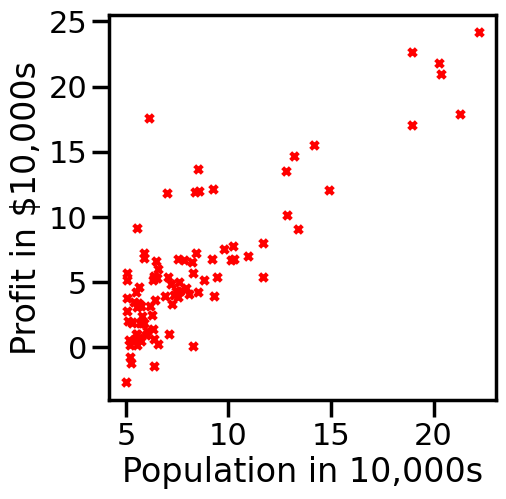

In [5]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.scatter(x=df['Population'],y=df['Profit'],s=30,c='red',marker='x')
ax.set(xlabel=('Population in 10,000s'),ylabel=('Profit in $10,000s'))
plt.show()

## Fitting Linear Regression using gradient descent

In [6]:
def GradientDescent(X,y,alpha=0.01,iterations=1500):
    """ This function inputs the predictor data X, response Y, alpha i.e the learning rate and
    number of iterations.
    
    Output- Optimized parameters of the Linear Regression Equation"""
    
    converged=False
    itr=0
    cost=[]
    #Convert the feature space and repsonse to matrix
    X=np.matrix(X).T
    y=np.matrix(y).T
    
    #Adding a column of ones to X
    ones=np.ones(X.shape[0])
    X=np.c_[ones,X]
    
    #Initializing thetas to zero
    theta=np.zeros((X.shape[1],1))
    
    #number of samples
    m=X.shape[0]
    
    for i in range(iterations):
        hypothesis=np.dot(X,theta)
        loss=hypothesis-y
        J=np.sum(np.power(loss,2))/(2*m)  ##cost function
        cost.append(J)
        gradient = np.dot(X.T,loss)/m
        theta = theta - alpha*gradient
        
    plt.plot(np.arange(0,1500),cost)
    plt.xlabel('No.of Iterations')
    plt.ylabel('J(cost)')
    plt.show()
    return theta
        

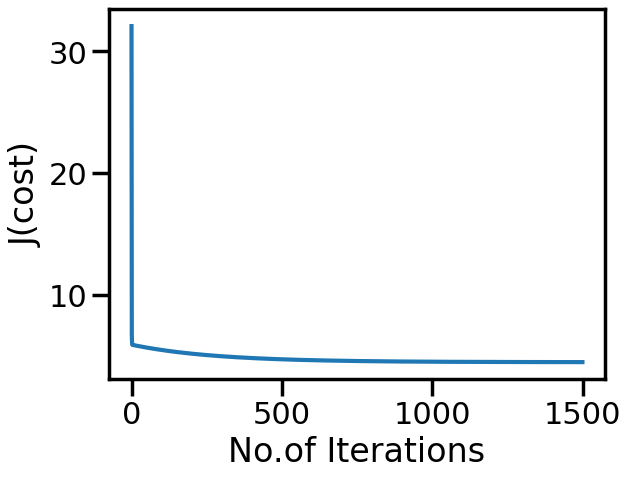

In [7]:
theta=GradientDescent(X=df.Population,y=df.Profit)

## Plotting Linear Regression Line using Gradient Descent and Scikit-Learn

In [8]:
from sklearn.linear_model import LinearRegression

/var/folders/6c/w_j2_mvd1sxfwnmjdr2y99c40000gn/T/ipykernel_35986/2014310275.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yy = float(theta[0])+float(theta[1])*xx


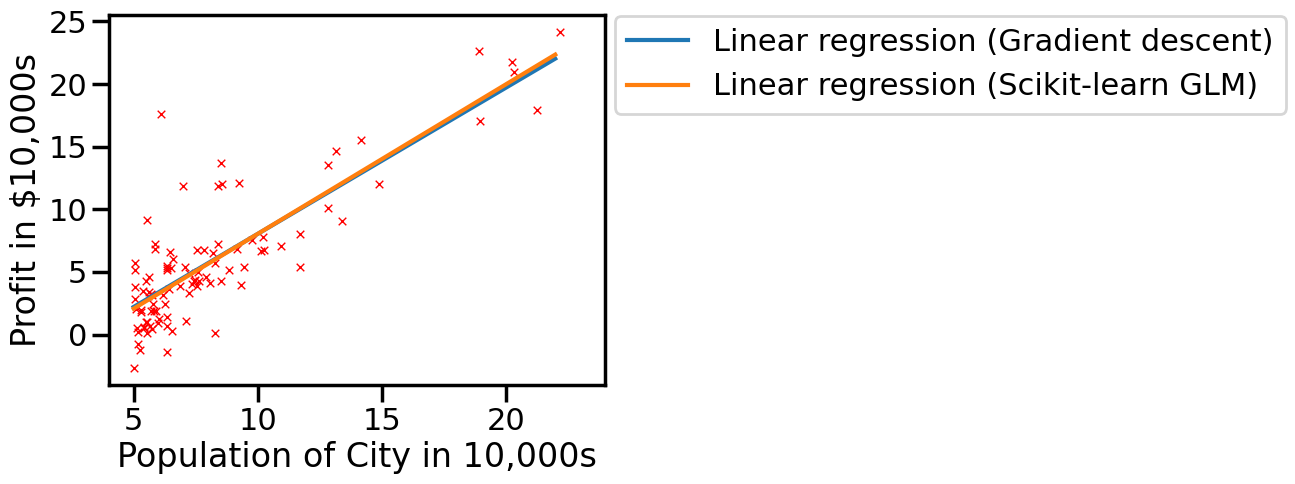

In [9]:
xx = np.arange(5,23)
yy = float(theta[0])+float(theta[1])*xx

# Plot gradient descent
plt.scatter(df.Population, df.Profit, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(df.Population.values.reshape(-1,1), df.Profit)
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(bbox_to_anchor=(0.99,1.04));
